In [1]:
from tensorflow import keras

In [2]:
keras.__version__

'2.12.0'

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('wine.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [6]:
df['quality_enc']=np.where(df['quality']=='bad',0,1)

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_enc
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0


In [8]:
df.drop(['quality'],inplace=True,axis=1)

In [9]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split as tts

In [11]:
Xtr,Xte,ytr,yte=tts(X,y,random_state=42,test_size=0.3)

In [13]:
from keras.models import Sequential as seq
from keras.layers import Dense

In [17]:
Xtr.shape[1:]

(11,)

In [25]:
model=seq()
model.add(Dense(30,activation='relu',input_shape=Xtr.shape[1:]))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='softmax'))

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                360       
                                                                 
 dense_13 (Dense)            (None, 25)                775       
                                                                 
 dense_14 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1,161
Trainable params: 1,161
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [29]:
hist=model.fit(Xtr,ytr,epochs=25,batch_size=16)

Epoch 1/25
70/70 [==============================] - 0s 812us/step - loss: 0.6220 - accuracy: 0.5255
Epoch 2/25
70/70 [==============================] - 0s 811us/step - loss: 0.6213 - accuracy: 0.5255
Epoch 3/25
70/70 [==============================] - 0s 942us/step - loss: 0.6227 - accuracy: 0.5255
Epoch 4/25
70/70 [==============================] - 0s 797us/step - loss: 0.6171 - accuracy: 0.5255
Epoch 5/25
70/70 [==============================] - 0s 783us/step - loss: 0.6215 - accuracy: 0.5255
Epoch 6/25
70/70 [==============================] - 0s 812us/step - loss: 0.6143 - accuracy: 0.5255
Epoch 7/25
70/70 [==============================] - 0s 855us/step - loss: 0.6182 - accuracy: 0.5255
Epoch 8/25
70/70 [==============================] - 0s 797us/step - loss: 0.6216 - accuracy: 0.5255
Epoch 9/25
70/70 [==============================] - 0s 783us/step - loss: 0.6179 - accuracy: 0.5255
Epoch 10/25
70/70 [==============================] - 0s 798us/step - loss: 0.6167 - accuracy: 0.5255

In [30]:
df=pd.DataFrame(hist.history)

<Axes: >

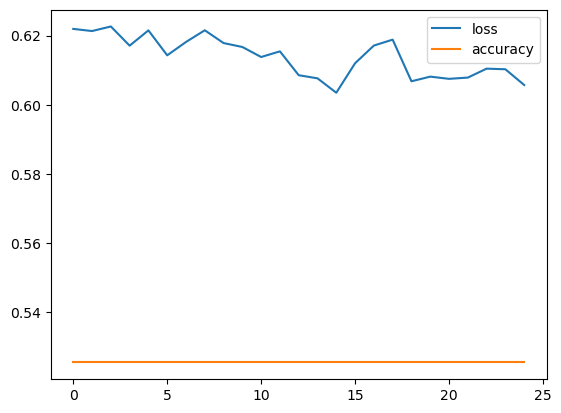

In [31]:
df.plot()

In [34]:
y_pred=model.predict(Xte)

15/15 [==============================] - 0s 784us/step


In [33]:
from sklearn.metrics import accuracy_score as acs

In [35]:
acs(y_pred,yte)

0.55625